# Import Needed Modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data In

## Use Pandas read_csv to bring in the local CSV

In [4]:
book_data = pd.read_csv("assets/best_book_21st.csv")

## Use columns function to see what columns are included in the data and to see the exact spelling of the column.

In [5]:
book_data.columns

Index(['id', 'title', 'series', 'author', 'book_link', 'genre',
       'date_published', 'publisher', 'num_of_page', 'lang', 'review_count',
       'rating_count', 'rate', 'award'],
      dtype='object')

# Manipulate and Clean Data

## Start by dropping unneeded columns using the drop() function

## Then use the info() function to gather information and see what else is needed to clean the data

In [6]:
alt_book_data = book_data.drop(columns=['id', 'series', 'book_link', 'publisher', 'lang', 'award'])

alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           10018 non-null  object 
 1   author          10003 non-null  object 
 2   genre           9019 non-null   object 
 3   date_published  9970 non-null   object 
 4   num_of_page     9737 non-null   float64
 5   review_count    10003 non-null  object 
 6   rating_count    10003 non-null  object 
 7   rate            10003 non-null  float64
dtypes: float64(2), object(6)
memory usage: 626.2+ KB


## Use value_counts() function to find duplicate titles

In [7]:
alt_book_data['title'].value_counts()

Bloodlines (Bloodlines, #1)                                              4
The Shack                                                                3
The God Delusion                                                         3
Prey                                                                     3
Dominion                                                                 3
                                                                        ..
Shakespeare Saved My Life                                                1
The Power (The Secret, #2)                                               1
Henna House                                                              1
I Remember Running: The Year I Got Everything I Ever Wanted - and ALS    1
The Immortal Hunter (Argeneau #11; Rogue Hunter #2)                      1
Name: title, Length: 9098, dtype: int64

## Use drop_duplicates() function to drop any duplicate titles making sure to keep the first instance of each duplicate so that we don't lose any data

In [8]:
alt_book_data.drop_duplicates(subset='title', keep='first', inplace=True)

## Use isnull().sum() to see the number of missing values in the dataset

In [9]:
alt_book_data.isnull().sum()

title               0
author             15
genre             974
date_published     47
num_of_page       278
review_count       15
rating_count       15
rate               15
dtype: int64

## Use dropna() function to remove the rows that contain null values

In [10]:
alt_book_data.dropna(inplace=True)

## Use split() function to drop the comma and everything after it in the genre column

## Use sample() function to view what data looks like at this point

In [11]:
alt_book_data['genre']=alt_book_data['genre'].str.split(',').str[0]

alt_book_data.sample(10)

,title,author,genre,date_published,num_of_page,review_count,rating_count,rate
2624,Twilight of the Elites: America After Meritocracy,Christopher L. Hayes,Politics,June 12th 2012,304.0,642,"5,802",4.00
7400,A Piece of Cake,Cupcake Brown,Autobiography,2006,544.0,"2,545","31,008",4.17
9778,"One Grave at a Time (Night Huntress, #6)",Jeaniene Frost,Paranormal,August 30th 2011,358.0,"2,199","48,111",4.21
4118,Wait Till I'm Dead: Uncollected Poems,"Allen Ginsberg,Bill Morgan,Rachel Zucker",Poetry,February 2nd 2016,256.0,68,368,3.79
198,Can You Keep a Secret?,Sophie Kinsella,Womens Fiction,December 27th 2005,374.0,"13,054","407,068",3.84
2687,Keeper of the Lost Cities (Keeper of the Lost ...,Shannon Messenger,Fantasy,October 2nd 2012,496.0,"5,221","43,721",4.44
8952,Healing Invisible Wounds: Paths to Hope and Re...,Richard F. Mollica,Nonfiction,December 4th 2006,288.0,15,80,4.15
9931,"Devoted in Death (In Death, #41)",J.D. Robb,Mystery,September 15th 2015,374.0,"1,498","19,357",4.38
4043,How Asia Works: Success and Failure in the Wor...,Joe Studwell,Economics,June 25th 2013,320.0,337,"3,266",4.27
9921,"Return of the Highlander (Immortal Warriors, #1)",Sara Mackenzie,Science Fiction,July 25th 2006,384.0,23,571,3.87


## Convert the review_count and the rating_count columns to float64 using astype() function

In [12]:
alt_book_data['review_count'] = alt_book_data['review_count'].str.replace(',', '').astype(int)

In [13]:
alt_book_data['review_count'] = alt_book_data['review_count'].astype(int)

## Rename the "rate" colum to "rating" using the rename() function

In [14]:
alt_book_data.rename(columns = {'rate':'rating'}, inplace = True)
alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7960 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           7960 non-null   object 
 1   author          7960 non-null   object 
 2   genre           7960 non-null   object 
 3   date_published  7960 non-null   object 
 4   num_of_page     7960 non-null   float64
 5   review_count    7960 non-null   int32  
 6   rating_count    7960 non-null   object 
 7   rating          7960 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 528.6+ KB


# Analyze Data and Visualize Data

## Use .mean() function to find the average rating of all the titles on a scale of 1-5

In [15]:
alt_book_data['rating'].mean()

3.9643643216080404

## Use .sum() to find the total number of pages in all of the books combined

In [16]:
alt_book_data['num_of_page'].sum()

2882223.0

## Use .nlargest() to create a new dataframe that shows the 5 titles with the highest number of pages

In [17]:
top_titles = alt_book_data.nlargest(5, 'num_of_page')

print(top_titles[['title', 'num_of_page']])

                                                  title  num_of_page
5490           Harry Potter Boxset (Harry Potter, #1-7)       4167.0
2900  A Song of Ice and Fire (A Song of Ice and Fire...       4081.0
9202  The Dark Tower Series: Books 1-7 (The Dark Tow...       3914.0
7832       Harry Potter Collection (Harry Potter, #1-6)       3342.0
6124  The Collected Joe Abercrombie: The Blade Itsel...       3008.0


## Use .count() function along with .nlargest() function to show the 5 authors with the most titles as well as show that information on a graph

In [18]:
top_authors = alt_book_data.groupby('author')['title'].count().nlargest(5)

print(top_authors)

author
Lynsay Sands        26
Stephen King        21
Kelley Armstrong    20
Lucian Bane         20
Richelle Mead       20
Name: title, dtype: int64


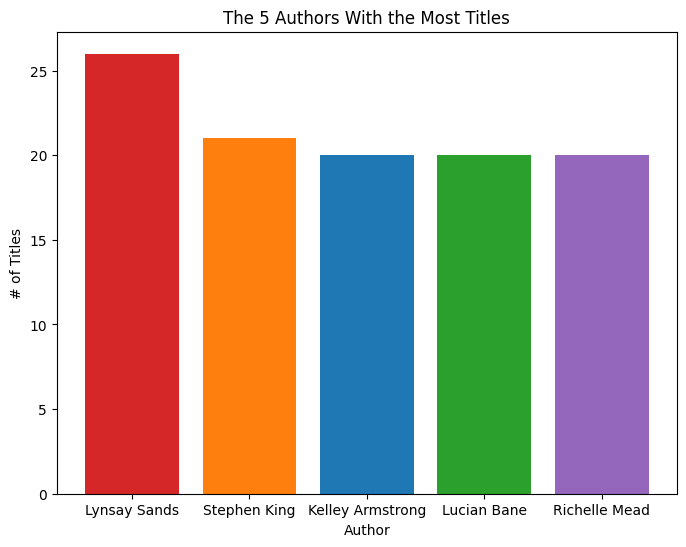

In [19]:
plt.figure(figsize=(8, 6))
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:purple']
plt.bar(top_authors.index, top_authors.values, color=colors)
plt.title('The 5 Authors With the Most Titles')
plt.xlabel('Author')
plt.ylabel('# of Titles')
plt.show()

## Use .groupby(), .agg(), and sort_values() functions to identify the top five book genres based on their average rating and total number of reviews, but only considering genres that have at least 100 reviews.

In [20]:
top_genres = alt_book_data.groupby('genre').agg({'rating': 'mean', 'review_count': 'sum'})
top_genres = top_genres[top_genres['review_count'] >= 100]
top_genres = top_genres.sort_values(by=['rating', 'review_count'], ascending=False).head(5)

print(top_genres)

               rating  review_count
genre                              
Urban        4.509000          1358
Classics     4.340000           158
Polyamorous  4.326667          2639
Language     4.245000           235
Amish        4.238333          1816


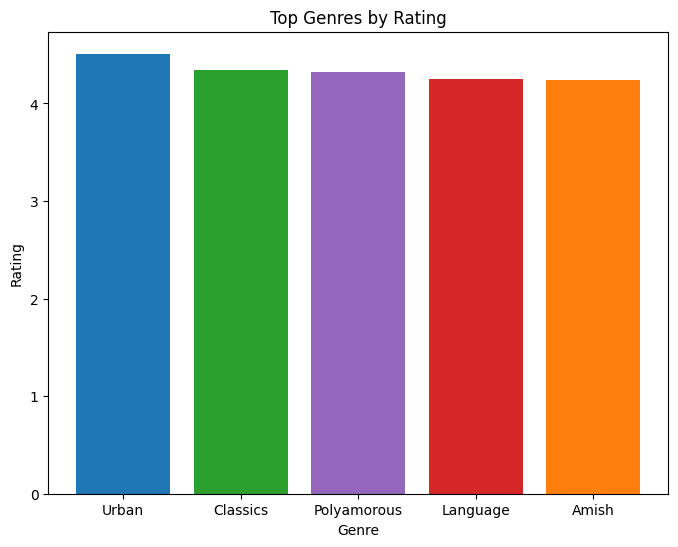

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['tab:blue', 'tab:green', 'tab:purple', 'tab:red', 'tab:orange']
ax.bar(top_genres.index, top_genres['rating'], color=colors)
ax.set_title('Top Genres by Rating')
ax.set_xlabel('Genre')
ax.set_ylabel('Rating')
plt.show()

# Interpret Data

* The average rating between all titles is 3.96 out of 5. I found this to be higher than I expected.
* There is a total of 2882223 pages combined between all of the titles. 
* The title with the highest number of pages was Harry Potter Boxset (Books #1-7). Not surprising as there are 7 very large titles rolled into 1 title.
* The author with the most titles was Lynsay Sands with 26. This wassurprising because I expected someone like Stephen King.
* Finally the top genre based on ratings was the Urban genre. I expected it to be Science Fiction or Classics but, alas, that was not the case.